In [1]:
import random, math, os, importlib
import numpy as np
import matplotlib.pyplot as plt

import createstars

importlib.reload(createstars)

<module 'createstars' from 'C:\\Users\\josep\\Google Drive\\CS\\Academic\\Exoplanet Research\\createstars.py'>

In [2]:
#Load data
f = open("res/dataset.csv")
raw = f.readlines()
f.close()
#Stores a tuple, containing (TIC, Class, Data, Train/Test)
stars = list()
num_missing = [[0] * 2000, [0] * 2000, [0] * 2000]

complex_percentage = 0.2
n_s = 2000

distribution = [[0] * 500, [0] * 500, [0] * 500]
random.shuffle(raw)
for line in raw:
    line = [int(s.strip()) for s in line.split()]
    data = np.load(os.path.expanduser("~/.lightkurve-cache/mastDownload/TESS_processed/") + str(line[0]) + ".npy")
    center1 = len(data[0]) // 2
    center2 = len(data[0][0]) // 2
    
    star_class = line[1]
    
    #plt.figure(dpi=160)
    #plt.imshow(data[0, :, :])
    #plt.colorbar()
    #for (j,i),label in np.ndenumerate(data[0, :, :]):
    #    plt.text(i,j,round(label * 100),ha='center',va='center')
    #plt.show()
    
    for frame in range(len(data)):
        if data[frame][center1][center2] <= 0:
            num_missing[star_class][frame] += 1
        
        if random.random() < complex_percentage:
            for value in data[frame].flatten():
                if value >= -0.5:
                    distribution[star_class][math.floor(value * 200) + 100] += 1
                else:
                    print(value)

print("Generating Stars.")
gen = 0
for i in range(n_s):
    
    gen += 1
    if gen % 10 == 0:
        print(gen, "/", n_s)
        createstars.save_stars()
        
    fakestar = createstars.create_stars(1, index = 1)
    data = fakestar[0][1]
    
    center1 = len(data[0]) // 2
    center2 = len(data[0][0]) // 2
    for frame in range(len(data)):
        if data[frame][center1][center2] <= 0:
            num_missing[2][frame] += 1
        
        if random.random() < complex_percentage:
            for value in data[frame].flatten():
                if value >= -0.5:
                    distribution[2][math.floor(value * 200) + 100] += 1
                else:
                    print(value)
    
createstars.save_stars()
np.save("res/missing_dist_20", np.array(num_missing))
np.save("res/val_dist_20", np.array(distribution))
print("Done.")

-0.5002723812099875
-0.5038993268062808
-0.5014849555988383
-0.5124508878345034
-0.5009439716037996
-0.504031833584989
Generating Stars.
10 / 2000
20 / 2000
30 / 2000
40 / 2000
50 / 2000
60 / 2000
70 / 2000
80 / 2000
90 / 2000
100 / 2000
110 / 2000
120 / 2000
130 / 2000
140 / 2000
150 / 2000
160 / 2000
170 / 2000
180 / 2000
190 / 2000
200 / 2000
210 / 2000
220 / 2000
230 / 2000
240 / 2000
250 / 2000


C:\Users\josep\Google Drive\CS\Academic\Exoplanet Research\cleanstars.py:135: RuntimeWarning: invalid value encountered in true_divide
  arr /= _get_median_brightest(arr)


[WARN] Too many removed frames (2000); remove star.
260 / 2000
270 / 2000
280 / 2000
290 / 2000
[WARN] Too many removed frames (2000); remove star.
300 / 2000
310 / 2000
320 / 2000
330 / 2000
340 / 2000
350 / 2000
360 / 2000
370 / 2000
380 / 2000
390 / 2000
400 / 2000
410 / 2000
420 / 2000
430 / 2000
440 / 2000
450 / 2000
460 / 2000
470 / 2000
480 / 2000
490 / 2000
500 / 2000
510 / 2000
520 / 2000
530 / 2000
540 / 2000
550 / 2000
560 / 2000
570 / 2000
580 / 2000
590 / 2000
600 / 2000
610 / 2000
620 / 2000
630 / 2000
640 / 2000
650 / 2000
660 / 2000
670 / 2000
680 / 2000
690 / 2000
700 / 2000
710 / 2000
720 / 2000
730 / 2000
740 / 2000
750 / 2000
760 / 2000
770 / 2000
780 / 2000
790 / 2000
800 / 2000
810 / 2000
820 / 2000
830 / 2000
840 / 2000
850 / 2000
860 / 2000
870 / 2000
880 / 2000
890 / 2000
900 / 2000
910 / 2000
920 / 2000
930 / 2000
[WARN] Too many removed frames (2000); remove star.
940 / 2000
950 / 2000
960 / 2000
970 / 2000
980 / 2000
990 / 2000
1000 / 2000
1010 / 2000
1020 /

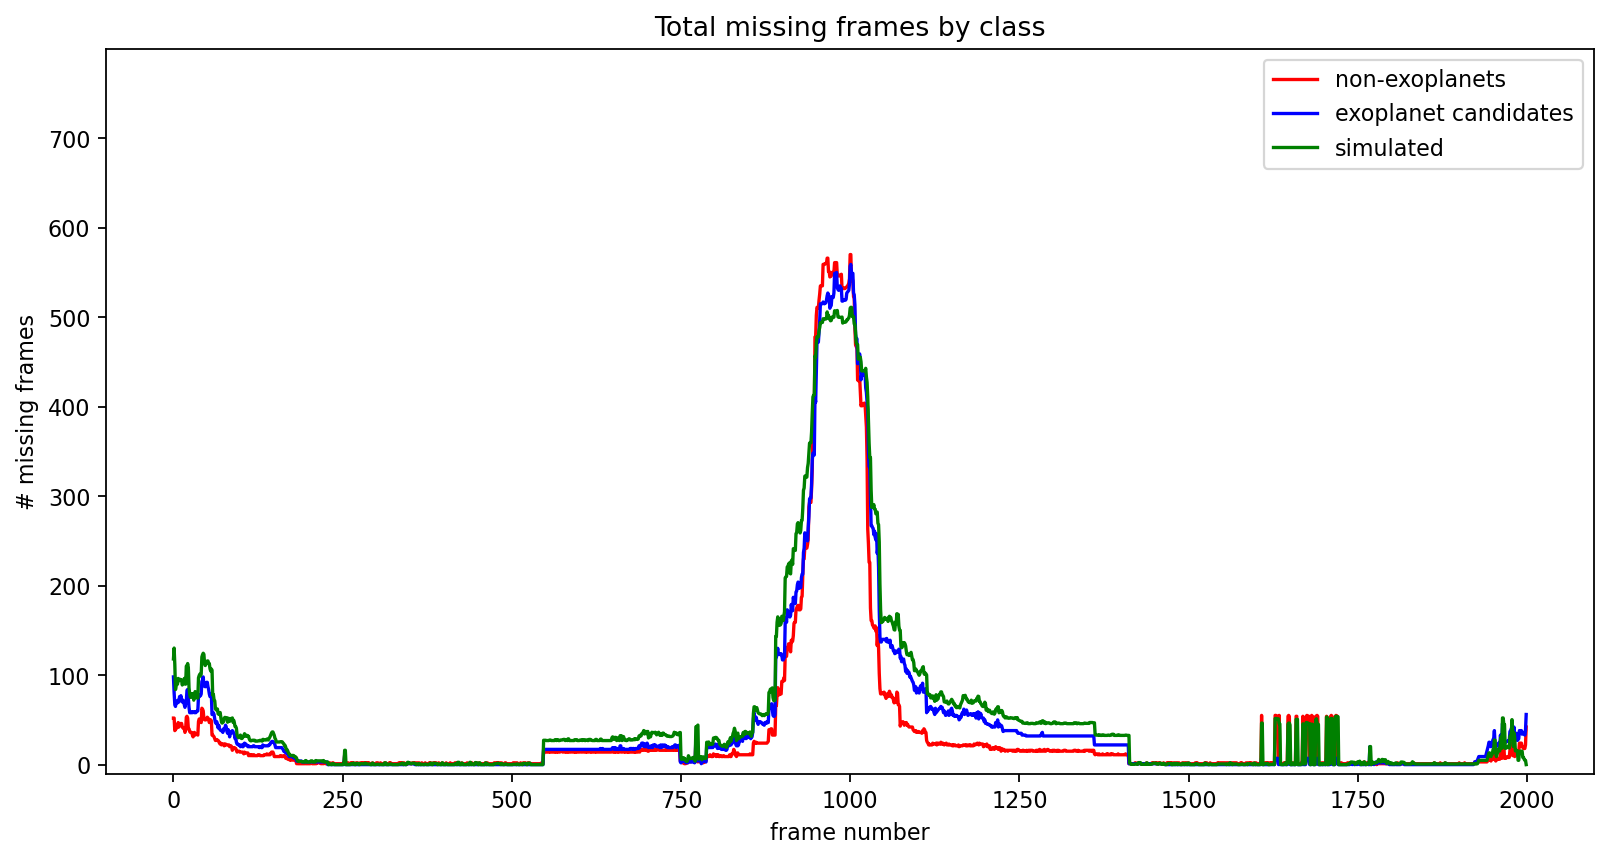

In [7]:
#Missing frame distribution

num_missing = np.load("res/missing_dist_20.npy")

plt.figure(dpi=160, figsize=(12, 6))
plt.plot(range(2000), num_missing[0], c="r", label="non-exoplanets")
plt.plot(range(2000), num_missing[1], c="b", label="exoplanet candidates")
plt.plot(range(2000), [item * (640 / 2000) for item in num_missing[2]], c="g", label="simulated")
plt.legend()
plt.ylim(-10, 800)
plt.yticks(range(0, 800, 100))
plt.xlabel("frame number")
plt.ylabel("# missing frames")
plt.title("Total missing frames by class")

plt.savefig("res/missing_frame_distribution")

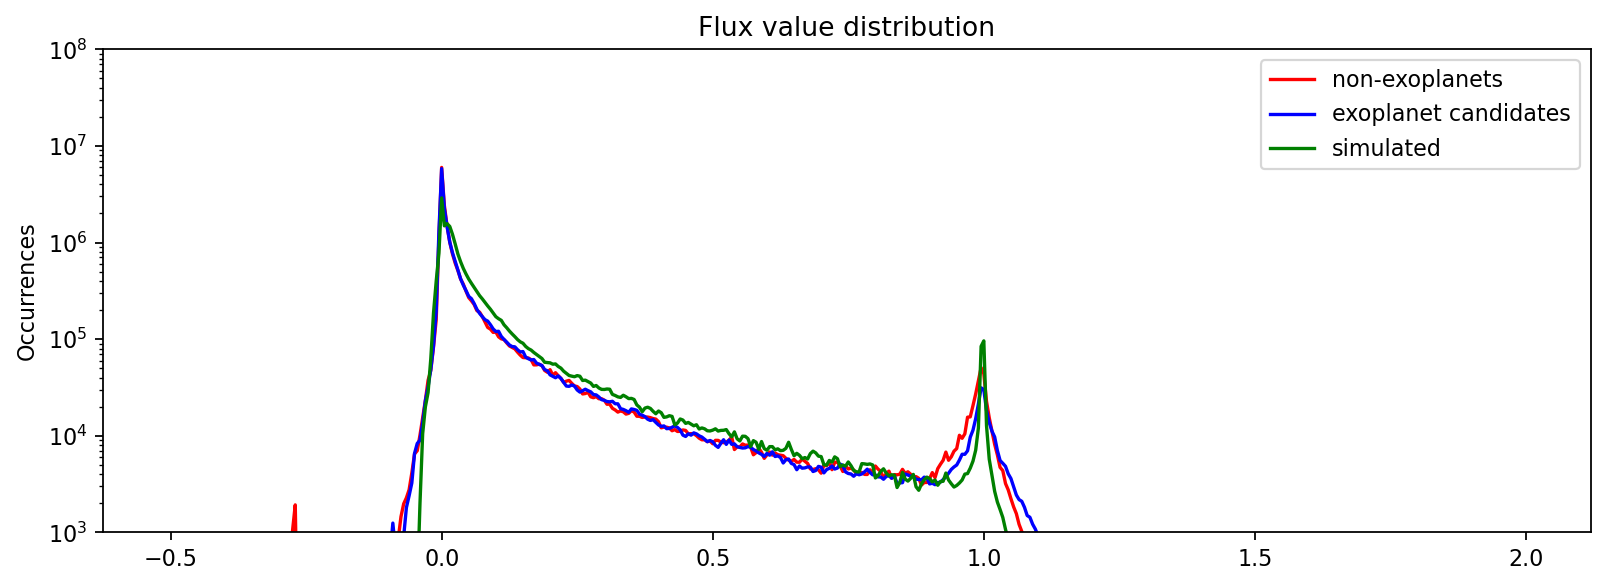

In [9]:
#Value distribution
plt.figure(dpi=160, figsize=(12, 4))
plt.plot(np.arange(-0.5, 2, 0.005), distribution[0], c="r", label="non-exoplanets")
plt.plot(np.arange(-0.5, 2, 0.005), distribution[1], c="b", label="exoplanet candidates")
plt.plot(np.arange(-0.5, 2, 0.005), [item * (640 / n_s) for item in distribution[2]], c="g", label="simulated")

plt.legend()
plt.yscale("log")
plt.title("Flux value distribution")
plt.ylabel("Occurrences")
plt.ylim(10e2, 10e7)
#plt.plot([-0.01, 0.06], [10e5, 10e5], ls="--", c="r", alpha=0.5)

plt.savefig("res/flux_distribution")

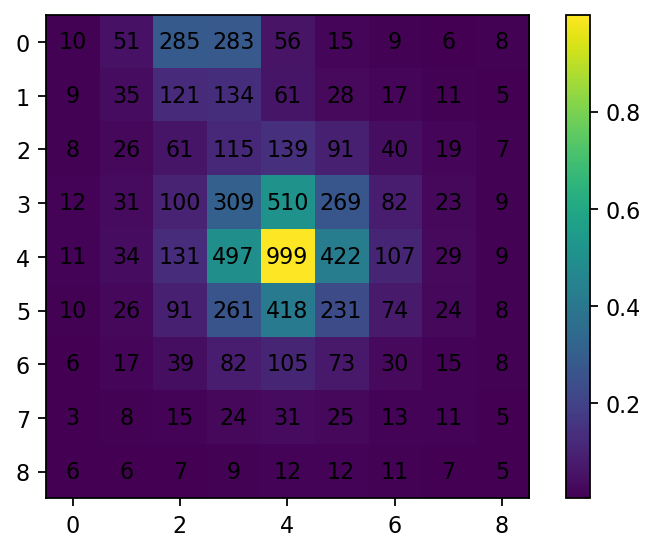

In [25]:
importlib.reload(createstars)
for star in createstars.create_stars(1, index = 5, read_bad = False, save = False):
    plt.figure(dpi=160)
    plt.imshow(star[1][0, :, :])
    plt.colorbar()
    for (j,i),label in np.ndenumerate(star[1][0, :, :]):
        plt.text(i,j,round(label * 1000),ha='center',va='center')
    plt.show()

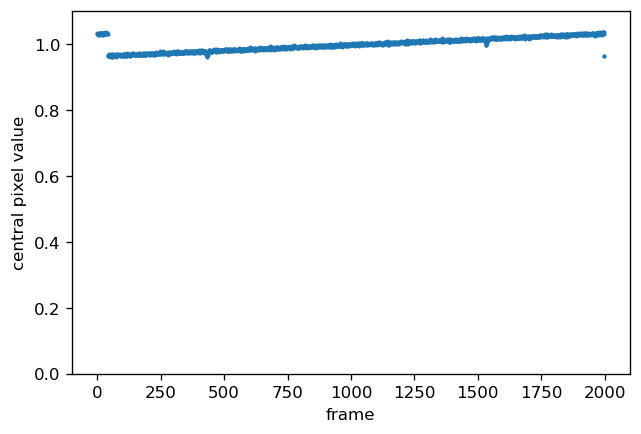

In [123]:
fakestar = createstars.create_stars(1, index = 5, read_bad = False, save = False)

data = fakestar[0][1][:, 4, 4]
plt.figure(dpi=120)
plt.scatter(list(range(0, 2000)), data, s=2)
#plt.ylim(0.9, 1.1)
plt.ylim(0, 1.1)
plt.xlabel("frame")
plt.ylabel("central pixel value")

plt.show()

HI asdf
